In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("covid_19_data.csv")

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Understanding Data

In [4]:
df.shape

(11341, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              11341 non-null  int64 
 1   ObservationDate  11341 non-null  object
 2   Province/State   7746 non-null   object
 3   Country/Region   11341 non-null  object
 4   Last Update      11341 non-null  object
 5   Confirmed        11341 non-null  int32 
 6   Deaths           11341 non-null  int32 
 7   Recovered        11341 non-null  int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 576.0+ KB


In [11]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3595
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [19]:
df["Country/Region"].value_counts()

US                     4796
china                  1920
Australia               331
Canada                  266
France                  136
                       ... 
Republic of Ireland       1
St. Martin                1
Gambia                    1
Belize                    1
Channel Islands           1
Name: Country/Region, Length: 203, dtype: int64

## Manipulating Data

In [18]:
df["Country/Region"].replace("Mainland China", "China", inplace=True)

In [ ]:
# We can observe 'Confirmed' 'Deaths' 'Recovered' columns are with float data type so converting them to INTEGER

In [20]:
df[["Confirmed", "Deaths", "Recovered"]]=df[["Confirmed", "Deaths", "Recovered"]].astype(int)

### Converting ObservationDate column to DateTime

In [22]:
df["ObservatonDate"]=pd.to_datetime(df["ObservationDate"], format="%m/%d/%Y")

In [23]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'ObservatonDate'],
      dtype='object')

#### dropping Serial no and Last Update columns from data

In [24]:
df.drop(["SNo", "Last Update"], inplace=True, axis=1)

In [25]:
df.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,ObservatonDate
0,01/22/2020,Anhui,china,1,0,0,2020-01-22
1,01/22/2020,Beijing,china,14,0,0,2020-01-22
2,01/22/2020,Chongqing,china,6,0,0,2020-01-22
3,01/22/2020,Fujian,china,1,0,0,2020-01-22
4,01/22/2020,Gansu,china,0,0,0,2020-01-22


### Date wise total Conformed, Recovered and Deaths all over the world

In [27]:
pd.set_option("display.max_rows", None)
date_wise_data=df.groupby(["ObservationDate"])["Confirmed", "Deaths", "Recovered"].sum().reset_index()
date_wise_data.head(10)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555,17,28
1,01/23/2020,653,18,30
2,01/24/2020,941,26,36
3,01/25/2020,1438,42,39
4,01/26/2020,2118,56,52
5,01/27/2020,2927,82,61
6,01/28/2020,5578,131,107
7,01/29/2020,6165,133,126
8,01/30/2020,8235,171,143
9,01/31/2020,9925,213,222


#### Active cases column Generation

In [29]:
df["Active_cases"]=df["Confirmed"]-df["Deaths"]-df["Recovered"]
df.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,ObservatonDate,Active_cases
0,01/22/2020,Anhui,china,1,0,0,2020-01-22,1
1,01/22/2020,Beijing,china,14,0,0,2020-01-22,14
2,01/22/2020,Chongqing,china,6,0,0,2020-01-22,6
3,01/22/2020,Fujian,china,1,0,0,2020-01-22,1
4,01/22/2020,Gansu,china,0,0,0,2020-01-22,0


#### Extracting world data for latest date

In [31]:
new_data=df[df["ObservationDate"]==max(df["ObservationDate"])].reset_index()
new_data_details=new_data.groupby(["ObservationDate"])["Confirmed", "Active_cases", "Deaths", "Recovered"].sum().reset_index()
new_data_details

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ObservationDate,Confirmed,Active_cases,Deaths,Recovered
0,03/23/2020,378287,260832,16497,100958


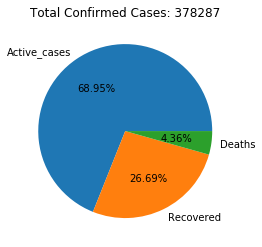

In [32]:
labels=["Active_cases", "Recovered", "Deaths"]
values=new_data_details.loc[0, ["Active_cases", "Recovered", "Deaths"]]
plt.pie(values, labels=labels, autopct="%1.2f%%")
plt.title("Total Confirmed Cases: "+str(new_data_details["Confirmed"][0]))
plt.show()

#### Grouping data by country and Order by Active Cases in Descending Order

In [36]:
Country_wise_data=new_data.groupby(["Country/Region"])["Confirmed", "Active_cases", "Recovered", "Deaths"].sum().sort_values("Active_cases", ascending=False).reset_index()
Country_wise_data

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country/Region,Confirmed,Active_cases,Recovered,Deaths
0,Italy,63927,50418,7432,6077
1,US,43667,43115,0,552
2,Spain,35136,29470,3355,2311
3,Germany,29056,28480,453,123
4,France,20123,17054,2207,862
5,Iran,23049,12861,8376,1812
6,Switzerland,8795,8544,131,120
7,UK,6726,6250,140,336
8,South Korea,8961,5684,3166,111
9,china,81116,5137,72709,3270


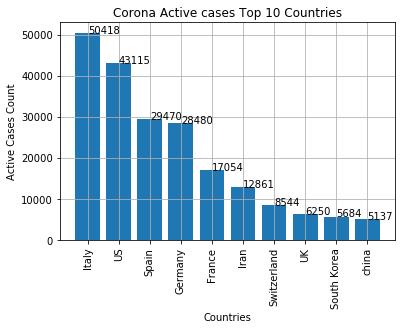

In [37]:
x=Country_wise_data["Country/Region"][:10]
y=Country_wise_data["Active_cases"][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("Corona Active cases Top 10 Countries")
plt.xlabel("Countries")
plt.ylabel("Active Cases Count")
for x,y in zip(x,y):
    plt.text(x,y,y)
plt.grid(True)
plt.show()

In [39]:
Country_wise_Confirmed_cases_data=new_data.groupby(["Country/Region"])["Confirmed", "Active_cases", "Deaths", "Recovered"].sum().sort_values("Confirmed", ascending=False).reset_index()
Country_wise_Confirmed_cases_data.head(30)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country/Region,Confirmed,Active_cases,Deaths,Recovered
0,china,81116,5137,3270,72709
1,Italy,63927,50418,6077,7432
2,US,43667,43115,552,0
3,Spain,35136,29470,2311,3355
4,Germany,29056,28480,123,453
5,Iran,23049,12861,1812,8376
6,France,20123,17054,862,2207
7,South Korea,8961,5684,111,3166
8,Switzerland,8795,8544,120,131
9,UK,6726,6250,336,140


#### Top 10 Countries with more Active Cases

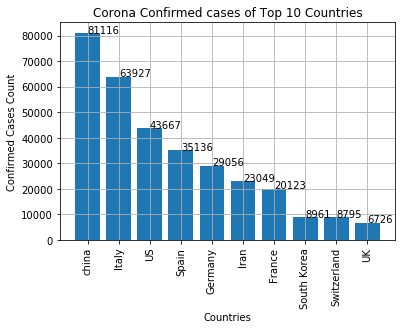

In [41]:
x=Country_wise_Confirmed_cases_data["Country/Region"][:10]
y=Country_wise_Confirmed_cases_data["Confirmed"][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("Corona Confirmed cases of Top 10 Countries")
plt.xlabel("Countries")
plt.ylabel("Confirmed Cases Count")
for x,y in zip(x,y):
    plt.text(x,y,y)
plt.grid(True)
plt.show()

#### Grouping data by country and Order by Recovered Cases in Descending Order

In [42]:
Country_wise_Recovered_cases_data=new_data.groupby(["Country/Region"])["Confirmed", "Active_cases", "Deaths", "Recovered"].sum().sort_values("Recovered", ascending=False).reset_index()
Country_wise_Recovered_cases_data.head(30)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country/Region,Confirmed,Active_cases,Deaths,Recovered
0,china,81116,5137,3270,72709
1,Iran,23049,12861,1812,8376
2,Italy,63927,50418,6077,7432
3,Spain,35136,29470,2311,3355
4,South Korea,8961,5684,111,3166
5,France,20123,17054,862,2207
6,Others,712,137,8,567
7,Germany,29056,28480,123,453
8,Belgium,3743,3254,88,401
9,Japan,1128,851,42,235


#### Top 10 Countries with more Recovered Cases

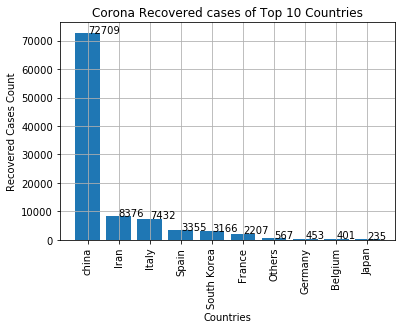

In [44]:
x=Country_wise_Recovered_cases_data["Country/Region"][:10]
y=Country_wise_Recovered_cases_data["Recovered"][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("Corona Recovered cases of Top 10 Countries")
plt.xlabel("Countries")
plt.ylabel("Recovered Cases Count")
for x,y in zip(x,y):
    plt.text(x,y,y)
plt.grid(True)
plt.show()

#### Grouping data by country and Order by Death Cases in Descending Order

In [46]:
Country_wise_Death_cases_data=new_data.groupby(["Country/Region"])["Confirmed", "Active_cases", "Deaths", "Recovered"].sum().sort_values("Deaths", ascending=False).reset_index()
Country_wise_Death_cases_data.head(30)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country/Region,Confirmed,Active_cases,Deaths,Recovered
0,Italy,63927,50418,6077,7432
1,china,81116,5137,3270,72709
2,Spain,35136,29470,2311,3355
3,Iran,23049,12861,1812,8376
4,France,20123,17054,862,2207
5,US,43667,43115,552,0
6,UK,6726,6250,336,140
7,Netherlands,4764,4547,214,3
8,Germany,29056,28480,123,453
9,Switzerland,8795,8544,120,131


#### Top 10 Countries with more Deaths

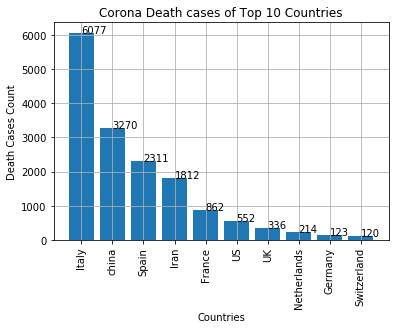

In [48]:
x=Country_wise_Death_cases_data["Country/Region"][:10]
y=Country_wise_Death_cases_data["Deaths"][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("Corona Death cases of Top 10 Countries")
plt.xlabel("Countries")
plt.ylabel("Death Cases Count")
for x,y in zip(x,y):
    plt.text(x,y,y)
plt.grid(True)
plt.show()

### Corona effect in our Country (INDIA)

In [49]:
India_data=df[df["Country/Region"]=="India"].reset_index(drop=True)
India_data.head(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,ObservatonDate,Active_cases
0,01/30/2020,NaN,India,1,0,0,2020-01-30,1
1,01/31/2020,NaN,India,1,0,0,2020-01-31,1
2,02/01/2020,NaN,India,1,0,0,2020-02-01,1
3,02/02/2020,NaN,India,2,0,0,2020-02-02,2
4,02/03/2020,NaN,India,3,0,0,2020-02-03,3
5,02/04/2020,NaN,India,3,0,0,2020-02-04,3
6,02/05/2020,NaN,India,3,0,0,2020-02-05,3
7,02/06/2020,NaN,India,3,0,0,2020-02-06,3
8,02/07/2020,NaN,India,3,0,0,2020-02-07,3
9,02/08/2020,NaN,India,3,0,0,2020-02-08,3


In [51]:
India_data.drop(['Province/State'],inplace=True,axis=1)

In [56]:
India_data["ObservationDate"]=pd.to_datetime(India_data["ObservationDate"])

#### Week wise Complete data of India

In [57]:
India_data['WeekOfYear']=India_data['ObservationDate'].dt.weekofyear
India_data.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,ObservatonDate,Active_cases,WeekOfYear
0,2020-01-30,India,1,0,0,2020-01-30,1,5
1,2020-01-31,India,1,0,0,2020-01-31,1,5
2,2020-02-01,India,1,0,0,2020-02-01,1,5
3,2020-02-02,India,2,0,0,2020-02-02,2,5
4,2020-02-03,India,3,0,0,2020-02-03,3,6


#### Week Wise Confirmed Cases in India

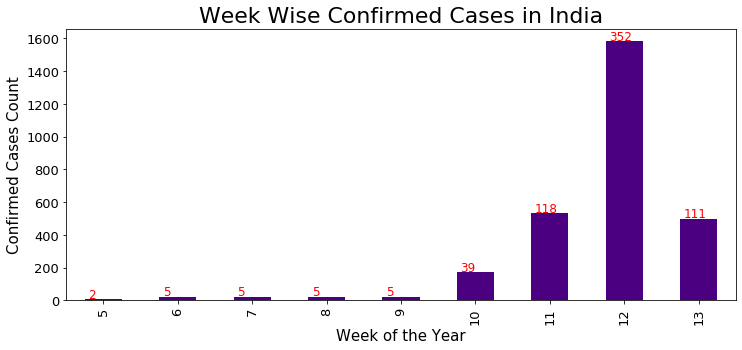

In [58]:
week_wise_india_data=India_data.groupby(['WeekOfYear'])['Confirmed'].sum().plot(kind='bar', figsize=(12,5), color="indigo", fontsize=13);
week_wise_india_data.set_title("Week Wise Confirmed Cases in India", fontsize=22)
week_wise_india_data.set_ylabel("Confirmed Cases Count", fontsize=15)
week_wise_india_data.set_xlabel("Week of the Year", fontsize=15);

totals = []
for i in week_wise_india_data.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in week_wise_india_data.patches:
    week_wise_india_data.text(i.get_x()+.05, i.get_height()+6.5, \
            str(int(np.ceil((i.get_height()/total)))),
            fontsize=12,
            color='red')
plt.show()

#### Week Wise Active Cases in India

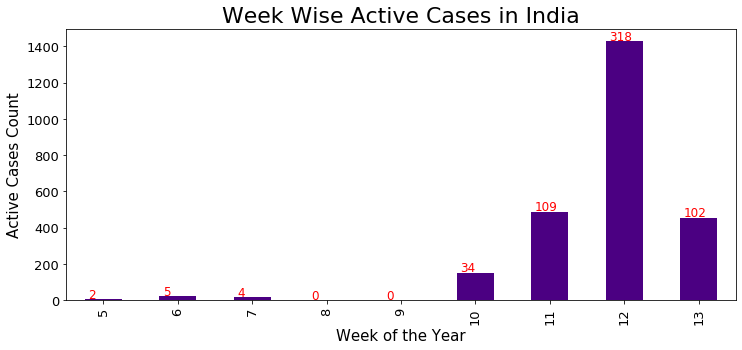

In [59]:
week_wise_india_Active_data=India_data.groupby(['WeekOfYear'])['Active_cases'].sum().plot(kind='bar', figsize=(12,5), color="indigo", fontsize=13);
week_wise_india_Active_data.set_title("Week Wise Active Cases in India", fontsize=22)
week_wise_india_Active_data.set_ylabel("Active Cases Count", fontsize=15)
week_wise_india_Active_data.set_xlabel("Week of the Year", fontsize=15);

totals = []
for i in week_wise_india_Active_data.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in week_wise_india_Active_data.patches:
    week_wise_india_Active_data.text(i.get_x()+.05, i.get_height()+6.5, \
            str(int(np.ceil((i.get_height()/total)))),
            fontsize=12,
            color='red')
plt.show()

#### Week wise recovering cases in india

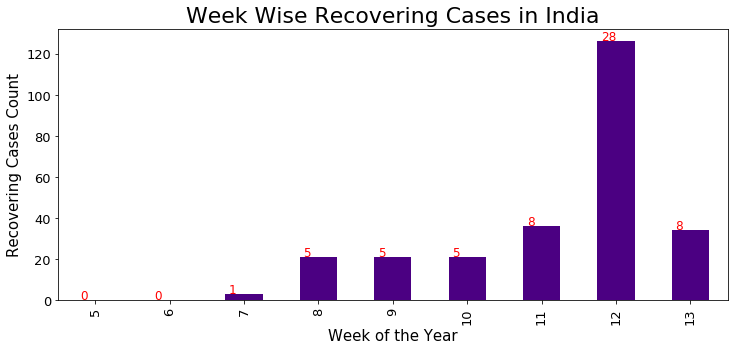

In [60]:
week_wise_india_recovering_data=India_data.groupby(['WeekOfYear'])['Recovered'].sum().plot(kind='bar', figsize=(12,5), color="indigo", fontsize=13);
week_wise_india_recovering_data.set_title("Week Wise Recovering Cases in India", fontsize=22)
week_wise_india_recovering_data.set_ylabel("Recovering Cases Count", fontsize=15)
week_wise_india_recovering_data.set_xlabel("Week of the Year", fontsize=15);

totals = []
for i in week_wise_india_recovering_data.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in week_wise_india_recovering_data.patches:
    week_wise_india_recovering_data.text(i.get_x()+.05, i.get_height()+0.5, \
            str(int(np.ceil((i.get_height()/total)))),
            fontsize=12,
            color='red')
plt.show()

#### Week wise death cases in India

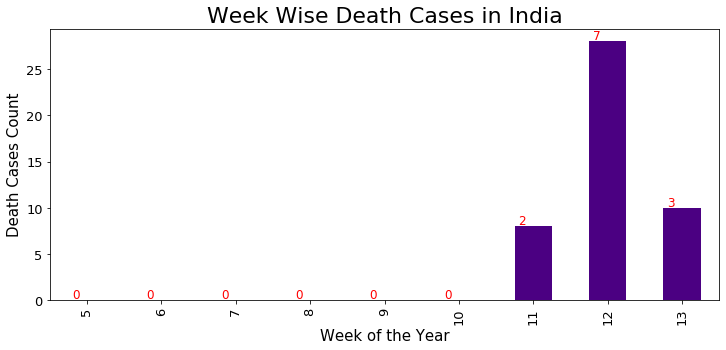

In [61]:
week_wise_india_death_data=India_data.groupby(['WeekOfYear'])['Deaths'].sum().plot(kind='bar', figsize=(12,5), color="indigo", fontsize=13);
week_wise_india_death_data.set_title("Week Wise Death Cases in India", fontsize=22)
week_wise_india_death_data.set_ylabel("Death Cases Count", fontsize=15)
week_wise_india_death_data.set_xlabel("Week of the Year", fontsize=15);

totals = []
for i in week_wise_india_death_data.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in week_wise_india_death_data.patches:
    week_wise_india_death_data.text(i.get_x()+.05, i.get_height()+0.2, \
            str(int(np.ceil((i.get_height()/total)))),
            fontsize=12,
            color='red')
plt.show()

#### Evolution of all Cases in India over time

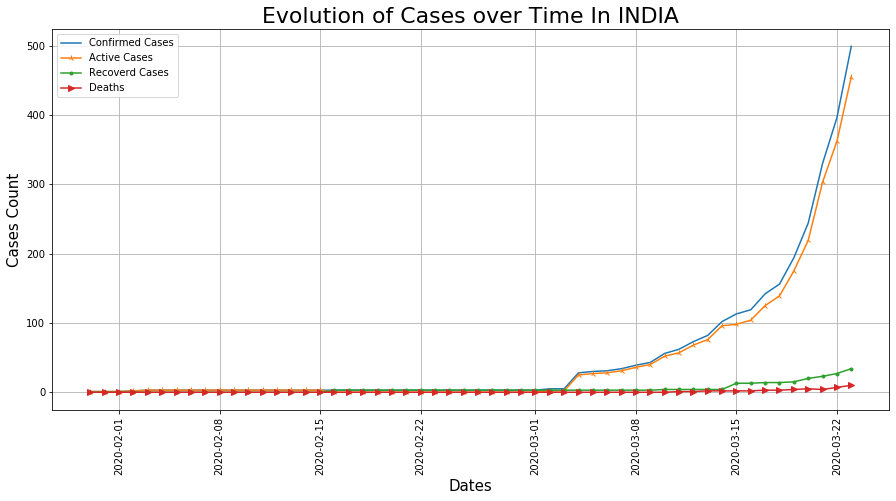

In [62]:
dates=India_data['ObservationDate']
c=India_data['Confirmed']
a=India_data['Active_cases']
d=India_data['Deaths']
r=India_data['Recovered']
plt.figure(figsize=(15,7))
plt.plot(dates,c)
plt.plot(dates,a,marker='2')
plt.plot(dates,r,marker='.')
plt.plot(dates,d,marker='>')
plt.xticks(rotation=90)
plt.title("Evolution of Cases over Time In INDIA",fontsize=22)
plt.xlabel('Dates',fontsize=15)
plt.ylabel('Cases Count',fontsize=15)
plt.grid(True)
plt.legend(['Confirmed Cases','Active Cases','Recoverd Cases','Deaths'])
plt.show()

#### Latest Data of India

In [63]:
India_latest_data = India_data[India_data['ObservationDate'] == max(India_data['ObservationDate'])].reset_index()

India_latest_data_details = India_latest_data.groupby(["ObservationDate"])["Confirmed","Active_cases","Recovered","Deaths"].sum().reset_index()
India_latest_data_details

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,ObservationDate,Confirmed,Active_cases,Recovered,Deaths
0,2020-03-23,499,455,34,10


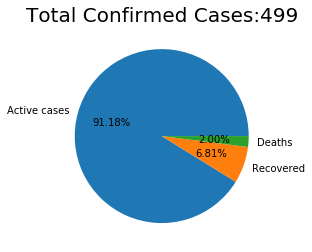

In [64]:
labels = ["Active cases","Recovered","Deaths"]
values = India_latest_data_details.loc[0, ["Active_cases","Recovered","Deaths"]]
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Total Confirmed Cases:'+str(India_latest_data_details['Confirmed'][0]),fontsize=20)
plt.show()

## This project was done by collecting data upto 23rd March, 2020. If you found this work helpful please upvote. Thank you.. Stay Home & Stay Safe... Lets protect our country by support Lock down...Jai Hind....